In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from itertools import repeat
import folium

# Разминка
## Импорт

In [3]:
data_name = 'data_gartseev'
df = pd.read_csv(f'./Data/{data_name}.csv')
df

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.259,37.525679,55.738373,0.0,4.0,166.0,0.0,0.998703,9.563507,1.149261,0.006151,599.5,0.0,0.006151,-,0.0,0.017152
22277,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.358,37.525679,55.738373,0.0,4.0,166.0,0.0,1.070480,9.641998,1.154083,0.006844,601.25,0.0,0.006844,-,0.0,0.017644
22278,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.458,37.525679,55.738373,0.0,4.0,166.0,0.0,1.026428,9.537384,1.169113,0.006450,601.25,0.0,0.006450,-,0.0,0.019176
22279,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.557,37.525679,55.738373,0.0,4.0,166.0,0.0,0.681564,8.894714,1.603546,-0.057069,609.0,0.0,-0.057069,-,0.0,0.063460


In [4]:
df.columns

Index(['GPS Time', ' Device Time', ' Longitude', ' Latitude',
       'GPS Speed (Meters/second)', ' Horizontal Dilution of Precision',
       ' Altitude', ' Bearing', ' G(x)', ' G(y)', ' G(z)', ' G(calibrated)',
       'Engine RPM(rpm)', 'Speed (OBD)(km/h)', 'Acceleration Sensor(Total)(g)',
       'Litres Per 100 Kilometer(Instant)(l/100km)', 'Speed (GPS)(km/h)',
       'Acceleration Sensor(Z axis)(g)'],
      dtype='object')

In [5]:
def pull_time(string, unit, round_range):
    pattern = [r'\d\d:\d\d:\d\d\.\d+',r'\d\d:\d\d:\d\d']
    for i in pattern:
        time_str = re.search(i, string)
        if time_str is not None:
            time_str = time_str.group()
            break
    time = list(map(int,re.findall(r'\d+',time_str)))
    if len(time) == 4:
        ms = time[-1] + time[-2]*1000 + time[-3]*60*1000 + time[-4]*60*60*1000
        if unit == 'h':
            ans = 1.*ms/(1000*60*60)
        elif unit == 'm':
            ans = 1.*ms/(1000*60)
        elif unit == 's':
            ans = 1.*ms/(1000)
        elif unit == 'ms':
            ans = 1.*ms
    elif len(time) == 3:
        s = time[-1] + time[-2]*60 + time[-3]*60*60
        if unit == 'h':
            ans = 1.*s/(60*60)
        elif unit == 'm':
            ans = 1.*s/(60)
        elif unit == 's':
            ans = 1.*s
        elif unit == 'ms':
            ans = 1.*s*1000
    return round(ans,round_range)

#Словарь соответствия полей (столбцов) датафрейма
data_accord = {'GPS Time':'GPS Time', 
               'Device Time':' Device Time',
               'Longitude':' Longitude',
               'Latitude':' Latitude',
               'GPS Speed (Meters/second)':' GPS Speed (Meters/second)',
               'Horizontal Dilution of Precision':' Horizontal Dilution of Precision',
               'Altitude':' Altitude',
               'Bearing':' Bearing',
               'G(x)':' G(x)',
               'G(y)':' G(y)',
               'G(z)':' G(z)',
               'G(calibrated)':' G(calibrated)',
               'Engine RPM(rpm)':'Engine RPM(rpm)',
               'Speed (OBD)(km/h)':'Speed (OBD)(km/h)',
               'Acceleration Sensor(Total)(g)':'Acceleration Sensor(Total)(g)',
               'Litres Per 100 Kilometer(Instant)(l/100km)':'Litres Per 100 Kilometer(Instant)(l/100km)',
               'Speed (GPS)(km/h)':'Speed (GPS)(km/h)',
               'Acceleration Sensor(Z axis)(g)':'Acceleration Sensor(Z axis)(g)'}
data_accord

{'GPS Time': 'GPS Time',
 'Device Time': ' Device Time',
 'Longitude': ' Longitude',
 'Latitude': ' Latitude',
 'GPS Speed (Meters/second)': ' GPS Speed (Meters/second)',
 'Horizontal Dilution of Precision': ' Horizontal Dilution of Precision',
 'Altitude': ' Altitude',
 'Bearing': ' Bearing',
 'G(x)': ' G(x)',
 'G(y)': ' G(y)',
 'G(z)': ' G(z)',
 'G(calibrated)': ' G(calibrated)',
 'Engine RPM(rpm)': 'Engine RPM(rpm)',
 'Speed (OBD)(km/h)': 'Speed (OBD)(km/h)',
 'Acceleration Sensor(Total)(g)': 'Acceleration Sensor(Total)(g)',
 'Litres Per 100 Kilometer(Instant)(l/100km)': 'Litres Per 100 Kilometer(Instant)(l/100km)',
 'Speed (GPS)(km/h)': 'Speed (GPS)(km/h)',
 'Acceleration Sensor(Z axis)(g)': 'Acceleration Sensor(Z axis)(g)'}

## Построение траектории

In [32]:
map_coord=df.copy()
# обьединяем широту долготу и добавляем в список
latitude = map_coord[data_accord['Latitude']].tolist()
longitude = map_coord[data_accord['Longitude']].tolist()
position = list(zip(latitude,longitude))

# создаем карту 
mymap = folium.Map(location=(0,0), zoom_start=16)

# Добавляем границы карты включающий две точки максимумы и минимумы широты и долготы
bounds = [(min(latitude),min(longitude)),(max(latitude),max(longitude))]
mymap.fit_bounds(bounds)

# # Добавляем путь на карту, соединяющий все точки
folium.PolyLine(locations = position, color='#E04100').add_to(mymap)

# Сохраняем карту в файл HTML
mymap.save(r'./Data/map.html')
mymap

## Построение скорости

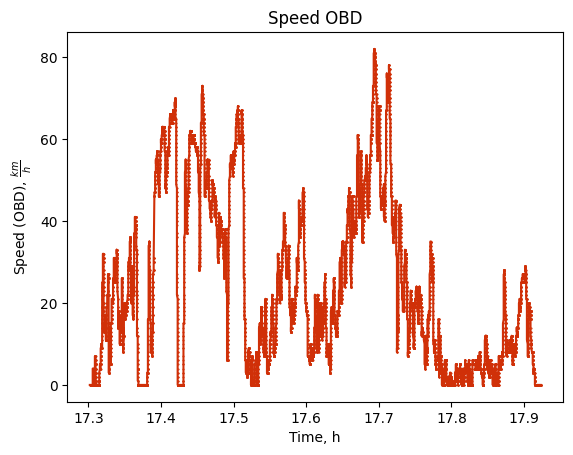

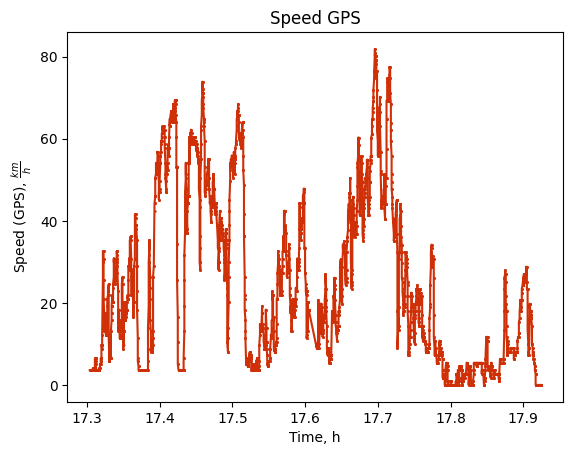

In [33]:
pass_symbol = '-'
unit = 'h' #Единицы измерения
#OBD
df1 = df[df[data_accord['Speed (OBD)(km/h)']] != pass_symbol]
x = list(map(pull_time,df1[data_accord['Device Time']].tolist(),repeat(unit),repeat(3)))
y = list(map(float,df[data_accord['Speed (OBD)(km/h)']].tolist()))

plt.plot(x,y, color='#D03008', marker = '.',markersize=1) 
plt.xlabel(f'Time, {unit}') #Подпись для оси х
plt.ylabel(r'Speed (OBD), $\frac{km}{h}$') #Подпись для оси y
plt.title('Speed OBD') #Название
plt.show()

#GPS
df2 = df[df[data_accord['Speed (GPS)(km/h)']] != pass_symbol]
x = list(map(pull_time,df2[data_accord['GPS Time']].tolist(),repeat(unit),repeat(3)))
y = list(map(round,list(map(float,df2[data_accord['Speed (GPS)(km/h)']].tolist())),repeat(2)))

plt.plot(x,y, color='#D03008', marker = '.',markersize=1) 
plt.xlabel(f'Time, {unit}') #Подпись для оси х
plt.ylabel(r'Speed (GPS), $\frac{km}{h}$') #Подпись для оси y
plt.title('Speed GPS') #Название
plt.show()

## Ориентация
Ориентация определяется только тогда, когда GPS-скорость ненулевая: берется начальная и конечная точки и строится вектор, по координатам которого можно определить ориентацию.

![](./Source/bearing.png)


## Разложение скорости по 2-м координатам

In [35]:
def decompose_vel(velocity,angle): #Разложение скорости по компонентам с учетом углового смещения
    offset_angle = -90 #Градусов
    return [velocity*np.cos(np.deg2rad(angle+offset_angle)),velocity*np.sin(np.deg2rad(angle+offset_angle))]

In [37]:
decompose_vel(1,135)

[0.7071067811865476, 0.7071067811865476]